In [1]:
# JesseRuiz_nlp_project_Codeup_2019

In [17]:
from requests import get
import requests
from bs4 import BeautifulSoup
import os
import json
from pprint import pprint
import re

import itertools as it
from typing import List, Dict
import pandas as pd

import numpy as np
import unicodedata

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

import time
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

random_state=123
import random

In [18]:
# Found on https://madnight.github.io/githut/#/pull_requests/2019/1
langs = ['JavaScript',
'Python',
'Java',
'Go',
'C++',
'Ruby',
'PHP',
'TypeScript',
'C#',
'C',
'Shell',
'Scala',
'Swift',
'Rust',
'Kotlin',
'Objective-C',
'Groovy',
'Elixir',
'Lua',
'DM',
'Perl',
'Dart',
'Clojure',
'PowerShell',
'CoffeeScript',
'Haskell',
'OCaml',
'R',
'Emacs Lisp',
'Vim script',
'Jsonnet',
'Erlang',
'Puppet',
'Julia',
'Smalltalk',
'MATLAB',
'WebAssembly',
'Fortran',
'F#',
'Visual Basic',
'Apex',
'ABAP',
'Vala',
'Nix',
'Crystal',
'Roff',
'Perl 6',
'FreeMarker',
'PureScript',
'Objective-C++',
'HTML',
'CSS',
'Vue']

In [3]:
langs = [element.lower() for element in langs]
langs

['javascript',
 'python',
 'java',
 'go',
 'c++',
 'ruby',
 'php',
 'typescript',
 'c#',
 'c',
 'shell',
 'scala',
 'swift',
 'rust',
 'kotlin',
 'objective-c',
 'groovy',
 'elixir',
 'lua',
 'dm',
 'perl',
 'dart',
 'clojure',
 'powershell',
 'coffeescript',
 'haskell',
 'ocaml',
 'r',
 'emacs lisp',
 'vim script',
 'jsonnet',
 'erlang',
 'puppet',
 'julia',
 'smalltalk',
 'matlab',
 'webassembly',
 'fortran',
 'f#',
 'visual basic',
 'apex',
 'abap',
 'vala',
 'nix',
 'crystal',
 'roff',
 'perl 6',
 'freemarker',
 'purescript',
 'objective-c++',
 'html',
 'css',
 'vue']

In [4]:
# Function shows a list of labels (Programming Language) of a repository. 
# The function takes a BeautifulSoup ResultSet and returns a list.
def get_labels(bs4resultset):
    labels = []
    for div in bs4resultset:
        repo_list = re.findall(r'.+', div.text.lower())
        lang = list(set(repo_list) & set(langs))
        if lang != []:
            labels.append(lang[0])
        else:
            labels.append('na')
    return labels


In [5]:
# Function shows what the user/repo_name and the label (Programming Language) is... 
# Creates a list of lists.

def repo_name_and_label(bs4resultset):
    name_label = []
    for div in bs4resultset:
        one = []
        one.append(re.findall(r'.*\s/\s.*',div.text)[0])
        lang = list(set(re.findall(r'.+', div.text.lower())) & set(langs))
        if lang != []:
            one.append(lang[0])
        else:
            one.append('na')
        name_label.append(one)
    return name_label

## Acquire

### General approach to choosing what type of data to scrape from Github: 
#### Use the url: https://github.com/search?o=desc&q=stars%3A%3E1&s=updated&type=Repositories
### This page shows the most recently updates repos on Github.

In [6]:
base_url = 'https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories'

In [7]:
headers = {'User-Agent': 'student'} # codeup.com doesn't like our default user-agent
response = get(base_url)

In [8]:
print(response.text[:400])



<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">
  <link rel="dns-prefetch" href="https:/


In [9]:
pprint(response.text)

('\n'
 '\n'
 '<!DOCTYPE html>\n'
 '<html lang="en">\n'
 '  <head>\n'
 '    <meta charset="utf-8">\n'
 '  <link rel="dns-prefetch" href="https://github.githubassets.com">\n'
 '  <link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">\n'
 '  <link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">\n'
 '  <link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">\n'
 '  <link rel="dns-prefetch" href="https://avatars3.githubusercontent.com">\n'
 '  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n'
 '  <link rel="dns-prefetch" '
 'href="https://user-images.githubusercontent.com/">\n'
 '\n'
 '\n'
 '\n'
 '  <link crossorigin="anonymous" media="all" '
 'integrity="sha512-3+HOqCwtQal5hOJQ+mdxiq5zmGOTjF6RhjDsPLxbKDYgGlLFeCwzoIanb7j5IiCuXKUqyC2q8FdkC4nmx2P2rA==" '
 'rel="stylesheet" '
 'href="https://github.githubassets.com/assets/frameworks-a2fba223d5af91496cac70d4ec3624df.css" '
 '/>\n'
 '  <link crossorigin="anonymous" media="

 'href="/topics/unity" title="Topic: unity" data-ga-click="Topic, search '
 'results" data-octo-click="topic_click" '
 'data-octo-dimensions="topic:unity,repository_id:98278558,repository_nwo:sintefneodroid/neo,repository_public:true,repository_is_fork:false">\n'
 '        unity\n'
 '</a>\n'
 '\n'
 '                <a class="topic-tag topic-tag-link f6 my-1" '
 'href="/topics/neo" title="Topic: neo" data-ga-click="Topic, search results" '
 'data-octo-click="topic_click" '
 'data-octo-dimensions="topic:neo,repository_id:98278558,repository_nwo:sintefneodroid/neo,repository_public:true,repository_is_fork:false">\n'
 '        neo\n'
 '</a>\n'
 '\n'
 '                <a class="topic-tag topic-tag-link f6 my-1" '
 'href="/topics/serves" title="Topic: serves" data-ga-click="Topic, search '
 'results" data-octo-click="topic_click" '
 'data-octo-dimensions="topic:serves,repository_id:98278558,repository_nwo:sintefneodroid/neo,repository_public:true,repository_is_fork:false">\n'
 '        serve

### Create a BeautifulSoup object

In [10]:
soup = BeautifulSoup(response.content, 'html.parser')


In [11]:
soup


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars0.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars1.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars2.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars3.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/frameworks-a2fba223d5af91496cac70d4ec3624df.css" integrity="sha512-3+HOqCwtQal5hOJQ+mdxiq5zmGOTjF6RhjDsPLxbKDYgGlLFeCwzoIanb7j5IiCuXKUqyC2q8FdkC4nmx2P2rA==" media="all" rel="stylesheet">
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/site-4540bebef0c6bac62c2b8b073beec16b.css" integrity="sha512-4ohd09bNnMlKWClfY22ZwyWNN3GJm

### This looks for the repo class, which is structured differently than the TRENDING page which we used before...
### Each page contains 10 repos... 

In [12]:
# We search for all the repositories that have the following class. We should get back 25 objects.
repo2 = soup.findAll('li', class_='repo-list-item d-flex flex-column flex-md-row flex-justify-start py-4 public source')
print(type(repo2))

<class 'bs4.element.ResultSet'>


In [13]:
print(len(repo2))

10


In [14]:
# Show what the repo looks like

for div in repo2:
    print(div.text)




SplendidStrontium/splendidstrontium.github.io


        my blog
      


        blog


        recipes


        technology


        writing


        entertainment


        science-fiction




          Updated May 13, 2019








CSS






          2
        






scikit-hep/particle


        Package to deal with HEP particles, the PDG particle data table, PDGIDs, etc.
      


        analysis


        pid


        particle


        hep


        particle-physics




          BSD-3-Clause license
        

          Updated May 13, 2019








Python






          17
        






p2pu/learning-circles


        Create local study groups that take online courses together
      


        education


        edtech


        open-education




          MIT license
        

          Updated May 13, 2019


            2 issues
            need help
          







Python






          10
        






fasterthanlime/lavish


        A service definition langua

### Now that we have an entirely different HTML text structure, we have to write new regex to capture the relevant information.

### This function crawls across multiple pages to scrape these pages. Aiming for 150 repos, which is 15 pages.

In [15]:
repo2

[<li class="repo-list-item d-flex flex-column flex-md-row flex-justify-start py-4 public source">
 <div class="col-12 col-md-8 pr-md-3">
 <h3>
 <a class="v-align-middle" data-hydro-click='{"event_type":"search_result.click","payload":{"page_number":1,"per_page":10,"query":"stars:&gt;1","result_position":1,"click_id":27060259,"result":{"id":27060259,"global_relay_id":"MDEwOlJlcG9zaXRvcnkyNzA2MDI1OQ==","model_name":"Repository","url":"https://github.com/SplendidStrontium/splendidstrontium.github.io"},"client_id":null,"originating_request_id":"C0AC:10F6:18AA248:29BE292:5CD959DA","originating_url":"https://github.com/search?o=desc&amp;p=1&amp;q=stars%3A%3E1&amp;s=updated&amp;type=Repositories","referrer":null,"user_id":null}}' data-hydro-click-hmac="c6e4599c5b3a0825107ff76757e2a1be98ef66094f462582fc4702e97091b87e" href="/SplendidStrontium/splendidstrontium.github.io">SplendidStrontium/splendidstrontium.github.io</a>
 </h3>
 <p class="col-12 col-md-9 d-inline-block text-gray mb-2 pr-4">
   

In [16]:
for div in repo2:
    print(div.text)




SplendidStrontium/splendidstrontium.github.io


        my blog
      


        blog


        recipes


        technology


        writing


        entertainment


        science-fiction




          Updated May 13, 2019








CSS






          2
        






scikit-hep/particle


        Package to deal with HEP particles, the PDG particle data table, PDGIDs, etc.
      


        analysis


        pid


        particle


        hep


        particle-physics




          BSD-3-Clause license
        

          Updated May 13, 2019








Python






          17
        






p2pu/learning-circles


        Create local study groups that take online courses together
      


        education


        edtech


        open-education




          MIT license
        

          Updated May 13, 2019


            2 issues
            need help
          







Python






          10
        






fasterthanlime/lavish


        A service definition langua

In [17]:
# Function shows what the user/repo_name and the label (Programming Language) is... 
# Creates a list of lists.

def repo_name_and_label(bs4resultset):
    name_label = []
    for div in bs4resultset:
        one = []
        one.append(re.findall(r'.*/.*',div.text)[0])
        lang = list(set(re.findall(r'.+', div.text.lower())) & set(langs))
        if lang != []:
            one.append(lang[0])
        else:
            one.append('na')
        name_label.append(one)
    return name_label

In [18]:
repo_name_and_label(repo2)

[['SplendidStrontium/splendidstrontium.github.io', 'css'],
 ['scikit-hep/particle', 'python'],
 ['p2pu/learning-circles', 'python'],
 ['fasterthanlime/lavish', 'rust'],
 ['retrofw/firmware', 'na'],
 ['SerhiiY-94/occdemo', 'c++'],
 ['Polyrific-Inc/OpenCatapult', 'c#'],
 ['sintefneodroid/neo', 'python'],
 ['YunoHost/yunohost', 'python'],
 ['franklymrshankly/Grid-Layer', 'javascript']]

In [19]:
# Finds the user/repo_name...
for div in repo2:
#     print(div.text)
    print(re.findall(r'.*/.*',div.text)[0])

SplendidStrontium/splendidstrontium.github.io
scikit-hep/particle
p2pu/learning-circles
fasterthanlime/lavish
retrofw/firmware
SerhiiY-94/occdemo
Polyrific-Inc/OpenCatapult
sintefneodroid/neo
YunoHost/yunohost
franklymrshankly/Grid-Layer


In [20]:
# Finds the number of stars...
for div in repo2:
#     print(div.text)
    print(re.findall(r'(\d)', div.text))

['1', '3', '2', '0', '1', '9', '2']
['3', '1', '3', '2', '0', '1', '9', '1', '7']
['2', '1', '3', '2', '0', '1', '9', '2', '1', '0']
['1', '3', '2', '0', '1', '9', '3']
['1', '3', '2', '0', '1', '9', '6', '4']
['9', '4', '1', '3', '2', '0', '1', '9', '3']
['3', '0', '1', '3', '2', '0', '1', '9', '1', '4']
['2', '0', '1', '3', '2', '0', '1', '9', '5']
['3', '0', '1', '3', '2', '0', '1', '9', '4', '1', '5']
['1', '3', '2', '0', '1', '9', '6']


### Okay, this can't be achieved with Regex... going to webscrape from the Repo site instead...

### How to find the URLS from many pages on this page: 
https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories

In [21]:
def get_url_list():
    '''Finds a long list of urls based on a max number of pages, which is hardcoded into the function.'''
    urls = []
    headers = {'User-Agent': 'Student'}
    url = 'https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories'
    response = get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    max_page = 100
    for i in range(1,max_page):
        url = 'https://github.com/search?o=desc&p=' + str(i) + '&q=stars%3A%3E1&s=updated&type=Repositories/'
        print(f'traversing url: {url}')
        response = get(url, headers=headers)
        soup = BeautifulSoup(response.text)
          
        repo = soup.findAll('li', class_='repo-list-item d-flex flex-column flex-md-row flex-justify-start py-4 public source')
        for div in repo:
            one = []
            one.append(re.findall(r'.*/.*',div.text)[0])
            urls.append(one)
        time.sleep(3)
        print(len(urls))        
#         print(urls)
    final_urls = []
    for url in urls:
        url = 'https://github.com/'+url[0]
        final_urls.append(url)
        
        
    return final_urls
            

In [173]:
first_url_list = get_url_list()

traversing url: https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=updated&type=Repositories/
10
traversing url: https://github.com/search?o=desc&p=2&q=stars%3A%3E1&s=updated&type=Repositories/
20
traversing url: https://github.com/search?o=desc&p=3&q=stars%3A%3E1&s=updated&type=Repositories/
30
traversing url: https://github.com/search?o=desc&p=4&q=stars%3A%3E1&s=updated&type=Repositories/
40
traversing url: https://github.com/search?o=desc&p=5&q=stars%3A%3E1&s=updated&type=Repositories/
50
traversing url: https://github.com/search?o=desc&p=6&q=stars%3A%3E1&s=updated&type=Repositories/
60
traversing url: https://github.com/search?o=desc&p=7&q=stars%3A%3E1&s=updated&type=Repositories/
70
traversing url: https://github.com/search?o=desc&p=8&q=stars%3A%3E1&s=updated&type=Repositories/
80
traversing url: https://github.com/search?o=desc&p=9&q=stars%3A%3E1&s=updated&type=Repositories/
90
traversing url: https://github.com/search?o=desc&p=10&q=stars%3A%3E1&s=updated&type=Repositories/
10

510
traversing url: https://github.com/search?o=desc&p=82&q=stars%3A%3E1&s=updated&type=Repositories/
510
traversing url: https://github.com/search?o=desc&p=83&q=stars%3A%3E1&s=updated&type=Repositories/
510
traversing url: https://github.com/search?o=desc&p=84&q=stars%3A%3E1&s=updated&type=Repositories/
510
traversing url: https://github.com/search?o=desc&p=85&q=stars%3A%3E1&s=updated&type=Repositories/
510
traversing url: https://github.com/search?o=desc&p=86&q=stars%3A%3E1&s=updated&type=Repositories/
510
traversing url: https://github.com/search?o=desc&p=87&q=stars%3A%3E1&s=updated&type=Repositories/
520
traversing url: https://github.com/search?o=desc&p=88&q=stars%3A%3E1&s=updated&type=Repositories/
530
traversing url: https://github.com/search?o=desc&p=89&q=stars%3A%3E1&s=updated&type=Repositories/
540
traversing url: https://github.com/search?o=desc&p=90&q=stars%3A%3E1&s=updated&type=Repositories/
550
traversing url: https://github.com/search?o=desc&p=91&q=stars%3A%3E1&s=updated

In [174]:
first_url_list

['https://github.com/NetBSD/src',
 'https://github.com/QubesOS/build-logs',
 'https://github.com/morozov-group/magento2-similar-products',
 'https://github.com/u-simon/springCloudDemo',
 'https://github.com/AMReX-Codes/amrex',
 'https://github.com/joeynmt/joeynmt',
 'https://github.com/JingningShi/MtreeRing',
 'https://github.com/rudix-mac/rudix',
 'https://github.com/PlatoJobs/PlatoJobs.github.io',
 'https://github.com/yongzhuo/nlp_xiaojiang',
 'https://github.com/alexherbo2/site',
 'https://github.com/opengeospatial/geotiff',
 'https://github.com/dawoudt/JustWatchAPI',
 'https://github.com/ryanbr/fanboy-adblock',
 'https://github.com/apple/swift-source-compat-suite',
 'https://github.com/MaksimRudnev/LittleHelpers',
 'https://github.com/alexherbo2/configuration.chrome',
 'https://github.com/ryanelandt/PressureFieldContact.jl',
 'https://github.com/Genivia/ugrep',
 'https://github.com/gochain-io/web3',
 'https://github.com/gochain-io/web3',
 'https://github.com/NetBSD/src',
 'https://

# Function name: get_url_list()
## This is the desired list of urls because we can use this function to find more than 100 repositories. The number of pages to scrape is hard coded into the function.

In [175]:
first_url_list[0]

'https://github.com/NetBSD/src'

In [179]:
def get_article_text(list):
    '''Takes a list of urls and pulls the README text into a dataframe and returns the dataframe.'''
    good_blobs = []
    read_me_list = []
    
    for element in list:
        url = element + '/blob/master/README.md'
        response = requests.get(url)
        soup = BeautifulSoup(response.text)
        read_me = soup.find(class_='markdown-body entry-content p-3 p-md-6')
#         read_me_list.append(str(blob) + ':')
        time.sleep(3)
        if read_me != None:
        
            read_me_list.append(read_me.text)
            good_blobs.append(element)
    result = pd.DataFrame(np.column_stack([good_blobs, read_me_list]), columns=['repo_name', 'readme'])
    return result

In [181]:
def get_repo_all(urls):
    '''Takes a list of urls and returns a dataframe with the repo title, the repos programming language, the original text of the 
    README file and the number of stars that the repo has. If there were multiple languages, 
    we took the language that had the highest percentage.'''
    good_blobs = []
    read_me_list = []
    language_top = []
    stars = []
    for url in urls:
        response = requests.get(url)        
        soup = BeautifulSoup(response.text)
        read_me = soup.find(class_='markdown-body entry-content p-5')
        
        if read_me != None:
            if soup.find('span', class_='lang') != None:
                language_rm = soup.find('span', class_='lang').text
                language_top.append(language_rm)
            else: 
                language_top.append('None')
                
            if soup.find('a', class_='social-count js-social-count') != None:
                stars.append((re.findall(r'(\d+)', soup.find('a', class_='social-count js-social-count').attrs['aria-label']))[0])
            else:
                stars.append('None')
            read_me_list.append(read_me.text)
            good_blobs.append(url.split('/', 3)[-1])       
            time.sleep(3)
            print('Total number of repos scraped...', len(good_blobs))
    df = pd.DataFrame(list(zip(good_blobs,language_top, read_me_list, stars)))
    df.columns = ['title', 'language', 'original', 'stars']
    return df

In [182]:
df = get_repo_all(first_url_list)

Total number of repos scraped... 1
Total number of repos scraped... 2
Total number of repos scraped... 3
Total number of repos scraped... 4
Total number of repos scraped... 5
Total number of repos scraped... 6
Total number of repos scraped... 7
Total number of repos scraped... 8
Total number of repos scraped... 9
Total number of repos scraped... 10
Total number of repos scraped... 11
Total number of repos scraped... 12
Total number of repos scraped... 13
Total number of repos scraped... 14
Total number of repos scraped... 15
Total number of repos scraped... 16
Total number of repos scraped... 17
Total number of repos scraped... 18
Total number of repos scraped... 19
Total number of repos scraped... 20
Total number of repos scraped... 21
Total number of repos scraped... 22
Total number of repos scraped... 23
Total number of repos scraped... 24
Total number of repos scraped... 25
Total number of repos scraped... 26
Total number of repos scraped... 27
Total number of repos scraped... 28
T

Total number of repos scraped... 226
Total number of repos scraped... 227
Total number of repos scraped... 228
Total number of repos scraped... 229
Total number of repos scraped... 230
Total number of repos scraped... 231
Total number of repos scraped... 232
Total number of repos scraped... 233
Total number of repos scraped... 234
Total number of repos scraped... 235
Total number of repos scraped... 236
Total number of repos scraped... 237
Total number of repos scraped... 238
Total number of repos scraped... 239
Total number of repos scraped... 240
Total number of repos scraped... 241
Total number of repos scraped... 242
Total number of repos scraped... 243
Total number of repos scraped... 244
Total number of repos scraped... 245
Total number of repos scraped... 246
Total number of repos scraped... 247
Total number of repos scraped... 248
Total number of repos scraped... 249
Total number of repos scraped... 250
Total number of repos scraped... 251
Total number of repos scraped... 252
T

Total number of repos scraped... 448
Total number of repos scraped... 449
Total number of repos scraped... 450
Total number of repos scraped... 451
Total number of repos scraped... 452
Total number of repos scraped... 453
Total number of repos scraped... 454
Total number of repos scraped... 455
Total number of repos scraped... 456
Total number of repos scraped... 457
Total number of repos scraped... 458
Total number of repos scraped... 459
Total number of repos scraped... 460
Total number of repos scraped... 461
Total number of repos scraped... 462
Total number of repos scraped... 463
Total number of repos scraped... 464
Total number of repos scraped... 465
Total number of repos scraped... 466
Total number of repos scraped... 467
Total number of repos scraped... 468
Total number of repos scraped... 469
Total number of repos scraped... 470
Total number of repos scraped... 471
Total number of repos scraped... 472
Total number of repos scraped... 473
Total number of repos scraped... 474
T

In [183]:
df.to_csv('github_large_data.csv', index=False)

In [186]:
df.sample(30)

,title,language,original,stars
5,JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2
400,iceiix/stevenarella,Rust,Stevenarella\n\nMulti-protocol Minecraft-compa...,92
470,swdotcom/swdc-vscode,TypeScript,\nCode Time for Visual Studio Code\n\nProgra...,51
105,dluciano/pokedex,JavaScript,\nThe project description can be founded here:...,2
45,HarryShomer/Hockey-Scraper,Python,\n\n\n\nHockey-Scraper\n\nPurpose\nThis packag...,58
171,sqlmapproject/sqlmap,Python,sqlmap\n \nsqlmap is an open source penetr...,14120
284,shopizer-ecommerce/shopizer-shop-angular,CSS,Shopizer\nDemo : https://shopizer-angular.hero...,2
333,Pttn/rieMiner,Assembly,rieMiner 0.9\nrieMiner is a Riecoin miner supp...,2
143,Pathoschild/StardewMods,C#,This repository contains my SMAPI mods for Sta...,140
249,Wadauk/scihub_ck,Perl,scihub_ck\n一个简版的Sci-hub可用域名检查工具。\nScihub_ck is...,72


# Prepare

### We have a working master notebook that saves a large dataframe with all the repos. Because this is so big, we saved it to a csv. 

## Read in CSV.

# First run of modeling, we acquired about 150 repos to do modeling. -> github_data.csv

# Second run through, we acquired about 522 repos. -> github_large_data.csv

In [19]:
from env import path

### Leaving the work for the first modeling phase below...

In [20]:
file = 'github_large_data.csv'

In [21]:
df = pd.read_csv(path+file, header='infer', index_col=0)

In [22]:
df

,language,original,stars
title,,,
NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157
morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5
u-simon/springCloudDemo,Java,springCloudDemo\n,2
AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130
joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46
JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2
yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19
alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2
opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6


In [23]:
df.shape

(522, 3)

In [24]:
gh = df.copy()

In [25]:
gh.shape

(522, 3)

## Clean

In [26]:
def original_word_count():
    df[['original_cnt']] = df[['original']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        df.original_cnt[art_num] = len(df['original'][art_num].split())
    df['original_cnt']=df['original_cnt'].astype(int)
    return df

In [27]:
original_word_count()
df.head()

,language,original,stars,original_cnt
title,,,,
NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169
morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111
u-simon/springCloudDemo,Java,springCloudDemo\n,2,1
AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556
joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615


In [28]:
def basic_clean():
    
    df[['article']] = df[['original']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        original = df.article[art_num]
        article = re.sub(r'\s', ' ', original).lower()
        normalized = unicodedata.normalize('NFKD', article)
        just_ascii = normalized.encode('ascii', 'ignore')
        article = just_ascii.decode('utf-8')
        without_special_chars = re.sub(r'[^\w\s]', ' ', article)
        word_list = without_special_chars.split()
        article_final = ' '.join(word_list)
        df.article[art_num] = article_final
    return df

In [29]:
basic_clean()

,language,original,stars,original_cnt,article
title,,,,,
NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...
morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...
u-simon/springCloudDemo,Java,springCloudDemo\n,2,1,springclouddemo
AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...
joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...
JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...
yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...
alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...
opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6,35,geotiff the key folder where the asciidoc spec...


In [30]:
def article_word_count():
    df[['article_cnt']] = df[['article']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        df.article_cnt[art_num] = len(df['article'][art_num].split())
    df['article_cnt']=df['article_cnt'].astype(int)
    return df

In [31]:
article_word_count()

,language,original,stars,original_cnt,article,article_cnt
title,,,,,,
NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188
morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124
u-simon/springCloudDemo,Java,springCloudDemo\n,2,1,springclouddemo,1
AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568
joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797
JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482
yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293
alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...,11
opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6,35,geotiff the key folder where the asciidoc spec...,45


In [32]:
def lemmatize():
    
    df[['lemmatized']] = df[['article']]
    art_nums = list(range(df.article.count()))
    wnl = nltk.stem.WordNetLemmatizer()
    for art_num in art_nums:
        lemm_article = df.lemmatized[art_num]
        lemmas = [wnl.lemmatize(word) for word in lemm_article.split()]
        article_lemmatized = ' '.join(lemmas)
        df.lemmatized[art_num] = article_lemmatized
    return df

In [33]:
lemmatize()

,language,original,stars,original_cnt,article,article_cnt,lemmatized
title,,,,,,,
NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd is a free fast secure and highly...
morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,magento2 similar product magento 2 similarity ...
u-simon/springCloudDemo,Java,springCloudDemo\n,2,1,springclouddemo,1,springclouddemo
AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,license amrex copyright c 2017 the regent of t...
joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal and purpose joey nmt framework i...
JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482,mtreering author jingning shi wei xiang licens...
yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,nlp_xiaojiang augmenttext eda hmm marko syntax...
alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...,11,site configuration theme build contributing pe...
opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6,35,geotiff the key folder where the asciidoc spec...,45,geotiff the key folder where the asciidoc spec...


In [34]:
def lemm_word_count():
    df[['lemm_cnt']] = df[['article']]
    art_nums = list(range(df.original.count()))
    for art_num in art_nums:
        df.lemm_cnt[art_num] = len(df['lemmatized'][art_num].split())
        
    df.lemm_cnt = df.lemm_cnt.astype(int)
    return df

In [35]:
lemm_word_count()

,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt
title,,,,,,,,
NetBSD/src,None,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd is a free fast secure and highly...,188
morozov-group/magento2-similar-products,PHP,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,magento2 similar product magento 2 similarity ...,124
u-simon/springCloudDemo,Java,springCloudDemo\n,2,1,springclouddemo,1,springclouddemo,1
AMReX-Codes/amrex,C++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,license amrex copyright c 2017 the regent of t...,568
joeynmt/joeynmt,Python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal and purpose joey nmt framework i...,1797
JingningShi/MtreeRing,R,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482,mtreering author jingning shi wei xiang licens...,482
yongzhuo/nlp_xiaojiang,Python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,nlp_xiaojiang augmenttext eda hmm marko syntax...,293
alexherbo2/site,JavaScript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...,11,site configuration theme build contributing pe...,11
opengeospatial/geotiff,HTML,geotiff\nThe key folder where the asciidoc spe...,6,35,geotiff the key folder where the asciidoc spec...,45,geotiff the key folder where the asciidoc spec...,45


### Examine how the lemmatize function worked... It looks like it didn't do TOO much work.

In [36]:
df['article'].iloc[0]


'netbsd netbsd is a free fast secure and highly portable unix like open source operating system it is available for a wide range of platforms from large scale servers and powerful desktop systems to handheld and embedded devices building you can cross build netbsd from most unix like operating systems to build for amd64 x86_64 in the src directory build sh u u j4 m amd64 o obj release additional build information available in the building file binaries daily builds releases testing on a running netbsd system cd usr tests atf run atf report troubleshooting send bugs and patches via web form subscribe to the mailing lists the netbsd users list is a good choice for many problems watch current users if you follow the bleeding edge of netbsd current join the community irc channel netbsd freenode latest sources to fetch the main cvs repository cvs d anoncvs anoncvs netbsd org cvsroot checkout p src to work in the git mirror which is updated every few hours from cvs git clone https github com

In [37]:
df['lemmatized'].iloc[0]

# df.loc[df['A'] == 'foo']

'netbsd netbsd is a free fast secure and highly portable unix like open source operating system it is available for a wide range of platform from large scale server and powerful desktop system to handheld and embedded device building you can cross build netbsd from most unix like operating system to build for amd64 x86_64 in the src directory build sh u u j4 m amd64 o obj release additional build information available in the building file binary daily build release testing on a running netbsd system cd usr test atf run atf report troubleshooting send bug and patch via web form subscribe to the mailing list the netbsd user list is a good choice for many problem watch current user if you follow the bleeding edge of netbsd current join the community irc channel netbsd freenode latest source to fetch the main cv repository cv d anoncvs anoncvs netbsd org cvsroot checkout p src to work in the git mirror which is updated every few hour from cv git clone http github com netbsd src git additio

## Explore the data that you have scraped. Here are some ideas for exploration:

* What are the most common words in READMEs?
* What does the distribution of IDFs look like for the most common words?
* Does the length of the README vary by language?
* Do different languages use a different number of unique words?

In [38]:
df.dtypes

language        object
original        object
stars            int64
original_cnt     int64
article         object
article_cnt      int64
lemmatized      object
lemm_cnt         int64
dtype: object

In [39]:
df.language.value_counts()

JavaScript             63
Python                 63
None                   49
Java                   43
C++                    39
C#                     32
HTML                   32
C                      24
Shell                  17
Go                     16
TypeScript             16
PHP                    15
CSS                    14
Rust                   10
Ruby                    7
Vue                     7
Scala                   6
Jupyter Notebook        6
R                       6
Lua                     5
Swift                   4
Dart                    4
Emacs Lisp              4
XSLT                    3
PowerShell              3
Haskell                 3
Perl                    3
Elixir                  2
Assembly                2
Groovy                  2
Kotlin                  2
Nix                     2
Processing              2
Clojure                 2
MATLAB                  1
PureScript              1
Pascal                  1
PLpgSQL                 1
Dockerfile  

### Make sure the language column is lower cased

In [40]:
df['language'] = df['language'].str.lower()

In [41]:
df.head()

,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt
title,,,,,,,,
NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd is a free fast secure and highly...,188
morozov-group/magento2-similar-products,php,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,magento2 similar product magento 2 similarity ...,124
u-simon/springCloudDemo,java,springCloudDemo\n,2,1,springclouddemo,1,springclouddemo,1
AMReX-Codes/amrex,c++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,license amrex copyright c 2017 the regent of t...,568
joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal and purpose joey nmt framework i...,1797


In [42]:
def remove_stopwords(extra_words=None, exclude_words=None):
    df = lemmatize()
    stopwords = nltk.corpus.stopwords.words('english')

    
    if extra_words != None:
        stopwords = stopwords + extra_words
    if exclude_words != None:
        stopwords = [word for word in stopwords if word not in exclude_words]
        
    
    df[['clean']] = df[['lemmatized']]
    df[['word_cnt_after_stop']] = df[['title']]

    art_nums = list(range(df.clean.count()))
    for art_num in art_nums:
        words = df.clean[art_num].split()
        without_stopwords = [word for word in words if word not in stopwords]
        df.word_cnt_after_stop[art_num] = len(without_stopwords)
        without_stopwords_join = ' '.join(without_stopwords)
        df.clean[art_num] = without_stopwords_join
    df[['per_stopwords_kept']] = df[['title']]
    df[['per_stopwords_kept']] = df.word_cnt_after_stop / df.lemm_cnt
    df[['per_stopwords_kept']] = df[['per_stopwords_kept']].astype(float)
    
    df[['per_overall_kept']] = df[['title']]
    df[['per_overall_kept']] = df.word_cnt_after_stop / df.original_cnt
    df[['per_overall_kept']] = df[['per_overall_kept']].astype(float)
   
    return df

In [43]:
# DO NOT RE-RUN THIS FUNCTION AFTER THE FIRST TIME RAN!
remove_stopwords(extra_words=langs)

KeyError: "['title'] not in index"

In [ ]:
df.head()

In [ ]:
df = df.drop(columns=('clean'))

In [ ]:
# Backup function in case the first one doesnt work.
def remove_stopwords(string, string_or_list='string', extra_words=None, exclude_words=None):
    """Removes the stopwords from the text then returns it. Able to add or remove stopwords."""
    stopword_list = stopwords.words('english') + langs
    if extra_words != None:
        for word in extra_words:
            stopword_list.append(word)
    if exclude_words != None:
        for word in exclude_words:
            stopword_list.remove(word)
    filtered_words = [word for word in string.split() if word not in stopword_list]
    filtered_string = ' '.join(filtered_words)
    if string_or_list == 'string':
        return filtered_string
    if string_or_list == 'list':
        return filtered_words

In [ ]:
df['clean'] = df.article.apply(remove_stopwords)

In [ ]:
df.head()

### Drop repos that have a low wordcount in the Readme file

In [56]:
df = df[df.original_cnt > 10]

In [57]:
df.shape

(459, 9)

In [58]:
df.head()

,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt,clean
title,,,,,,,,,
NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...
morozov-group/magento2-similar-products,php,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,magento2 similar product magento 2 similarity ...,124,magento2 similar products magento 2 similarity...
AMReX-Codes/amrex,c++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,license amrex copyright c 2017 the regent of t...,568,license amrex copyright 2017 regents universit...
joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...
JingningShi/MtreeRing,r,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482,mtreering author jingning shi wei xiang licens...,482,mtreering authors jingning shi wei xiang licen...


In [68]:
# During the second modeling phase we used the top 11 languages. 
#But the models didnt work well so we whittle it down to 5 top languages again.

In [69]:
top_langs = pd.DataFrame(df['language'].value_counts()[df['language'].value_counts()>30])
top_langs

,language
javascript,59
python,59
none,36
c++,34
java,33


In [70]:
top_langs_list = list(top_langs.index)
top_langs_list

['javascript', 'python', 'none', 'c++', 'java']

In [71]:
top_gh = df[df['language'].isin(top_langs_list)]

In [72]:
top_gh.shape

(221, 9)

In [73]:
top_gh

,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt,clean
title,,,,,,,,,
NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...
AMReX-Codes/amrex,c++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,license amrex copyright c 2017 the regent of t...,568,license amrex copyright 2017 regents universit...
joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...
yongzhuo/nlp_xiaojiang,python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,nlp_xiaojiang augmenttext eda hmm marko syntax...
alexherbo2/site,javascript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...,11,site configuration theme build contributing pe...,11,site configuration theme builds contributing p...
dawoudt/JustWatchAPI,python,JustWatchAPI\n\nJustWatch.com Python 3 API\nIn...,70,368,justwatchapi justwatch com python 3 api instal...,409,justwatchapi justwatch com python 3 api instal...,409,justwatchapi justwatch com 3 api install pytho...
apple/swift-source-compat-suite,python,Swift Source Compatibility Suite\nSource compa...,197,1130,swift source compatibility suite source compat...,1218,swift source compatibility suite source compat...,1218,source compatibility suite source compatibilit...
alexherbo2/configuration.chrome,javascript,Chrome – Configuration\n\nCompleted extension ...,3,31,chrome configuration completed extension for a...,31,chrome configuration completed extension for a...,31,chrome configuration completed extension dead ...
Genivia/ugrep,c++,ugrep: universal grep\nOffers powerful pre-def...,4,6370,ugrep universal grep offers powerful pre defin...,6884,ugrep universal grep offer powerful pre define...,6884,ugrep universal grep offers powerful pre defin...


### Now we have a dataframe, top_gh, which has 102 entries. These are the repos that have most occuring languages.

## Visualize

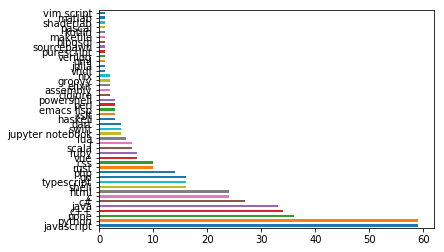

In [74]:
df.language.value_counts().plot.barh()

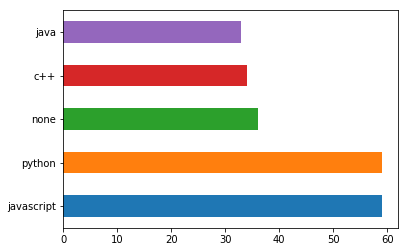

In [75]:
top_gh.language.value_counts().plot.barh()

### Explore the repos readme's that are PYTHON language...

In [76]:
py = top_gh[top_gh.language == 'python']
py.head()

,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt,clean
title,,,,,,,,,
joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...
yongzhuo/nlp_xiaojiang,python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,nlp_xiaojiang augmenttext eda hmm marko syntax...
dawoudt/JustWatchAPI,python,JustWatchAPI\n\nJustWatch.com Python 3 API\nIn...,70,368,justwatchapi justwatch com python 3 api instal...,409,justwatchapi justwatch com python 3 api instal...,409,justwatchapi justwatch com 3 api install pytho...
apple/swift-source-compat-suite,python,Swift Source Compatibility Suite\nSource compa...,197,1130,swift source compatibility suite source compat...,1218,swift source compatibility suite source compat...,1218,source compatibility suite source compatibilit...
joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...


In [81]:
py_words = ' '.join(py.clean)

In [82]:
py_words

'joey nmt goal purpose joey nmt framework developed educational purposes aims clean minimalistic code base help novices pursuing understanding following questions implement classic nmt architectures rnn transformer pytorch building blocks architectures interact modify blocks e g deeper wider modify training procedure e g add regularizer contrast nmt frameworks aim state art results speed engineering training tricks since often goes hand increase code complexity decrease readability however joey nmt implements baselines major publications contributors joey nmt developed joost bastings university amsterdam kreutzer heidelberg university features aim implement following features aka minimalist toolkit nmt recurrent encoder decoder grus lstms transformer encoder decoder attention types mlp dot multi head bilinear word bpe character based input handling bleu chrf evaluation beam search length penalty greedy decoding customizable initialization attention visualization learning curve plotting

(-0.5, 399.5, 199.5, -0.5)

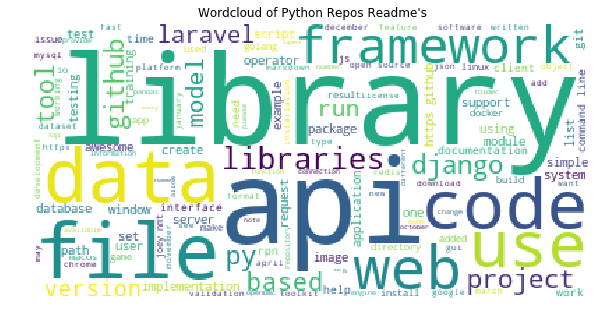

In [83]:
from wordcloud import WordCloud
img = WordCloud(background_color='white').generate(py_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.figure(figsize=(10,10))
plt.imshow(img)

plt.title('Wordcloud of Python Repos Readme\'s')
plt.axis('off')

### This shows us artifact, test and use are used a lot in Python Repo Readme files.

In [2]:
all_words = ' '.join(df.clean)
all_freq = pd.Series(all_words).value_counts()


NameError: name 'df' is not defined

### Compare the Python words with the All words collection in a Wordcloud

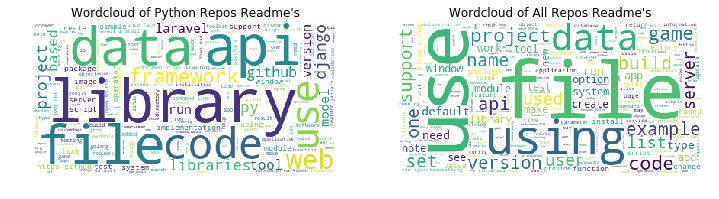

In [87]:
plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
img = WordCloud(background_color='white').generate(py_words)
plt.imshow(img)
plt.title('Wordcloud of Python Repos Readme\'s')
plt.axis('off')

plt.subplot(1, 2, 2)
img = WordCloud(background_color='white').generate(all_words)
plt.imshow(img)
plt.title('Wordcloud of All Repos Readme\'s')
plt.axis('off')

# fig.tight_layout(pad=2)

plt.box(False)

In [1]:
all_words


NameError: name 'all_words' is not defined

# Models!

## Logistic Regression

In [88]:
top_gh.language.value_counts(normalize=True)

javascript    0.266968
python        0.266968
none          0.162896
c++           0.153846
java          0.149321
Name: language, dtype: float64

In [89]:
top_gh.head()

,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt,clean
title,,,,,,,,,
NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...
AMReX-Codes/amrex,c++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,license amrex copyright c 2017 the regent of t...,568,license amrex copyright 2017 regents universit...
joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...
yongzhuo/nlp_xiaojiang,python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,nlp_xiaojiang augmenttext eda hmm marko syntax...
alexherbo2/site,javascript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...,11,site configuration theme build contributing pe...,11,site configuration theme builds contributing p...


In [90]:
top_gh.clean.values

array(['netbsd netbsd free fast secure highly portable unix like open source operating system available wide range platforms large scale servers powerful desktop systems handheld embedded devices building cross build netbsd unix like operating systems build amd64 x86_64 src directory build sh u u j4 amd64 obj release additional build information available building file binaries daily builds releases testing running netbsd system cd usr tests atf run atf report troubleshooting send bugs patches via web form subscribe mailing lists netbsd users list good choice many problems watch current users follow bleeding edge netbsd current join community irc channel netbsd freenode latest sources fetch main cvs repository cvs anoncvs anoncvs netbsd org cvsroot checkout p src work git mirror updated every hours cvs git clone https github com netbsd src git additional links netbsd guide netbsd manual pages netbsd cross reference',
       'license amrex copyright 2017 regents university california la

In [91]:
top_gh.language.values

array(['none', 'c++', 'python', 'python', 'javascript', 'python',
       'python', 'javascript', 'c++', 'none', 'c++', 'python', 'python',
       'python', 'java', 'python', 'python', 'none', 'c++', 'none',
       'javascript', 'python', 'none', 'javascript', 'javascript',
       'javascript', 'none', 'java', 'none', 'c++', 'javascript',
       'javascript', 'javascript', 'none', 'java', 'java', 'javascript',
       'python', 'python', 'java', 'none', 'python', 'python', 'c++',
       'javascript', 'python', 'javascript', 'python', 'none', 'none',
       'c++', 'javascript', 'javascript', 'java', 'python', 'javascript',
       'python', 'c++', 'javascript', 'none', 'java', 'java', 'c++',
       'javascript', 'javascript', 'c++', 'c++', 'javascript', 'python',
       'javascript', 'python', 'javascript', 'c++', 'javascript',
       'python', 'python', 'none', 'python', 'none', 'javascript', 'c++',
       'javascript', 'python', 'javascript', 'javascript', 'python',
       'javascript', 

In [92]:
docs = dict(zip(top_gh.language.values, top_gh.clean.values))

In [93]:
docs

{'none': 'osu wiki home osu wiki contributing please see contributing file interested helping project file caching wiki articles articles cached five hours images images cached two hours news posts news posts cached sixty days issues merging news post merge pull request fix tell ephemeral ephemeralis 0001 shiro shiro 1584 osu dev discord osu wiki channel force refresh fixed news post licence majority content repository licensed cc nc 4 0 please see licence file information tl dr use non commercial manner wiki may content third party licences licences cited local content override global licence file please note cover usage osu ppy branding software resources advertising promotion protected trademark law require clearance use terms please contact us',
 'c++': 'ardupilot project ardupilot project made arducopter apm copter code wiki arduplane apm plane code wiki ardurover apmrover2 code wiki ardusub apm sub code wiki antenna tracker code wiki user support discussion forums support forum h

In [94]:
docs.values()

dict_values(['osu wiki home osu wiki contributing please see contributing file interested helping project file caching wiki articles articles cached five hours images images cached two hours news posts news posts cached sixty days issues merging news post merge pull request fix tell ephemeral ephemeralis 0001 shiro shiro 1584 osu dev discord osu wiki channel force refresh fixed news post licence majority content repository licensed cc nc 4 0 please see licence file information tl dr use non commercial manner wiki may content third party licences licences cited local content override global licence file please note cover usage osu ppy branding software resources advertising promotion protected trademark law require clearance use terms please contact us', 'ardupilot project ardupilot project made arducopter apm copter code wiki arduplane apm plane code wiki ardurover apmrover2 code wiki ardusub apm sub code wiki antenna tracker code wiki user support discussion forums support forum http 

In [95]:
tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(docs.values())
tfidfs

<5x514 sparse matrix of type '<class 'numpy.float64'>'
	with 581 stored elements in Compressed Sparse Row format>

In [96]:
sm = pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names())
sm

,0001,10,100,11,123456,127,1337,1584,20000,2019,...,website,well,went,wiki,windows,without,write,yes,young,zone
0,0.069793,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069793,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.281544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.237294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.032326,0.000000,0.032326,0.000000,0.000000,0.129304,0.000000,0.000000,0.032326,...,0.032326,0.032326,0.032326,0.000000,0.052161,0.032326,0.032326,0.000000,0.032326,0.032326
4,0.000000,0.000000,0.052728,0.000000,0.052728,0.052728,0.000000,0.000000,0.052728,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.042540,0.000000,0.000000,0.052728,0.000000,0.000000


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = tfidf.fit_transform(top_gh.clean)
y = top_gh.language

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=random_state)
# not sure if we need to stratify y... so not doing it here... I think this is unneccessary because we dont have unbalanced set.
train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

lm = LogisticRegression().fit(X_train, y_train)

train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)

In [98]:
X_train

<176x16612 sparse matrix of type '<class 'numpy.float64'>'
	with 37186 stored elements in Compressed Sparse Row format>

In [99]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 98.86%
---
Confusion Matrix
actual      c++  java  javascript  none  python
predicted                                      
c++          27     0           0     0       0
java          0    26           0     0       0
javascript    0     0          46     1       0
none          0     0           0    28       0
python        0     0           1     0      47
---
              precision    recall  f1-score   support

         c++       1.00      1.00      1.00        27
        java       1.00      1.00      1.00        26
  javascript       0.98      0.98      0.98        47
        none       1.00      0.97      0.98        29
      python       0.98      1.00      0.99        47

   micro avg       0.99      0.99      0.99       176
   macro avg       0.99      0.99      0.99       176
weighted avg       0.99      0.99      0.99       176



In [100]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('---')
print(classification_report(test.actual, test.predicted))

Accuracy: 57.78%
---
Confusion Matrix
actual      c++  java  javascript  none  python
predicted                                      
c++           3     0           0     0       0
java          0     2           0     0       0
javascript    2     3          10     1       3
none          0     0           0     2       0
python        2     2           2     4       9
---
              precision    recall  f1-score   support

         c++       1.00      0.43      0.60         7
        java       1.00      0.29      0.44         7
  javascript       0.53      0.83      0.65        12
        none       1.00      0.29      0.44         7
      python       0.47      0.75      0.58        12

   micro avg       0.58      0.58      0.58        45
   macro avg       0.80      0.52      0.54        45
weighted avg       0.73      0.58      0.56        45



In [101]:
page_range = random.choice(range(101))
page_range

95

## Get some new random data

In [102]:
# this function will give a list of urls from a RANDOM page on GitHub.
def get_random_urls_list():
    '''Generates a list of 10 urls from a random page on GitHubs Most Recently Updated repos'''
    pg = random.choice(range(101))
    urls = []
    headers = {'User-Agent': 'Student'}
    url = 'https://github.com/search?o=desc&p='+ str(pg) + '&q=stars%3A%3E1&s=updated&type=Repositories'
    response = get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    repo = soup.findAll('li', class_='repo-list-item d-flex flex-column flex-md-row flex-justify-start py-4 public source')
    for div in repo:
        one = []
        one.append(re.findall(r'.*/.*',div.text)[0])
        urls.append(one)
#     print(len(urls))        
#         print(urls)
    final_urls = []
    for url in urls:
        url = 'https://github.com/'+url[0]
        final_urls.append(url)
    return final_urls

In [103]:
def clean(text):
    '''A simple function to cleanup text data'''
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [104]:
# Depends upon get_random_urls_list() function
def rand_url():
    '''Finds a random item from a list of urls. That list of urls is generated by another function, get_random_url_list()'''
    return random.choice(get_random_urls_list())

In [105]:
random_url = rand_url()
random_url

'https://github.com/AlexLixin/study'

In [106]:
# This function depends on random_url() function, which finds a random url.
def new_rand_readme():
    '''Finds the readme file from the randomly generated url on GitHubs Most Recently Updated repos'''
    headers = {'User-Agent': 'Student'}
    response = get(random_url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    read_me = soup.find(class_='markdown-body entry-content p-5')
    read_me.text
    test_text = ' '.join(clean(read_me.text))
    return test_text

In [107]:
new_rand_readme()

'repository used store study project lxi'

## Predict

In [108]:
def predict(unknown_text):
    return lm.predict(tfidf.transform([unknown_text]))[0]

In [109]:
print('Predicted the following language, ', predict(new_rand_readme()),',', 'for the following README.md file:', new_rand_readme())

Predicted the following language,  javascript , for the following README.md file: repository used store study project lxi


In [110]:
df.head()

,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt,clean
title,,,,,,,,,
NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...
morozov-group/magento2-similar-products,php,magento2-similar-products\n\nMagento 2 Similar...,5,111,magento2 similar products magento 2 similarity...,124,magento2 similar product magento 2 similarity ...,124,magento2 similar products magento 2 similarity...
AMReX-Codes/amrex,c++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,license amrex copyright c 2017 the regent of t...,568,license amrex copyright 2017 regents universit...
joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...
JingningShi/MtreeRing,r,"MtreeRing\nAuthors: Jingning Shi, Wei Xiang\nL...",2,466,mtreering authors jingning shi wei xiang licen...,482,mtreering author jingning shi wei xiang licens...,482,mtreering authors jingning shi wei xiang licen...


In [111]:
encoder = LabelEncoder()
encoder.fit(top_gh.language)
top_gh[['lang_encoded']] = top_gh[['language']]
top_gh.lang_encoded = encoder.transform(top_gh.lang_encoded)
top_gh.head()

,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt,clean,lang_encoded
title,,,,,,,,,,
NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,3
AMReX-Codes/amrex,c++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,license amrex copyright c 2017 the regent of t...,568,license amrex copyright 2017 regents universit...,0
joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...,4
yongzhuo/nlp_xiaojiang,python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,nlp_xiaojiang augmenttext eda hmm marko syntax...,4
alexherbo2/site,javascript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...,11,site configuration theme build contributing pe...,11,site configuration theme builds contributing p...,2


# Using t-SNE to make Visualization
### Use the TFIDFs from this logistic regression model.

In [112]:
vectors = TfidfVectorizer().fit_transform(top_gh.clean)
vectors

<221x16612 sparse matrix of type '<class 'numpy.float64'>'
	with 46682 stored elements in Compressed Sparse Row format>

In [113]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(vectors)

In [114]:
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 221 samples in 0.000s...
[t-SNE] Computed neighbors for 221 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 221 / 221
[t-SNE] Mean sigma: 0.251662
[t-SNE] Computed conditional probabilities in 0.016s
[t-SNE] Iteration 50: error = 63.2170715, gradient norm = 0.4245085 (50 iterations in 0.116s)
[t-SNE] Iteration 100: error = 65.1349335, gradient norm = 0.4142704 (50 iterations in 0.164s)
[t-SNE] Iteration 150: error = 66.0960236, gradient norm = 0.4419129 (50 iterations in 0.094s)
[t-SNE] Iteration 200: error = 62.7925720, gradient norm = 0.4834598 (50 iterations in 0.085s)
[t-SNE] Iteration 250: error = 62.2322693, gradient norm = 0.4837651 (50 iterations in 0.147s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.232269
[t-SNE] Iteration 300: error = 1.1141230, gradient norm = 0.0110070 (50 iterations in 0.089s)
[t-SNE] Iteration 350: error = 0.9097120, gradient norm = 0.0067034 

In [115]:
X_embedded[:, 0]

array([ 1.09401712e+01, -1.04807258e+00,  1.46469469e+01,  8.18907452e+00,
       -1.05929699e+01, -3.98756444e-01, -5.79340363e+00,  3.46660018e+00,
       -3.68710542e+00,  1.09400339e+01, -1.04918778e+00,  1.46439695e+01,
       -8.83237267e+00, -6.08424902e-01, -2.39240289e+00, -1.83886433e+00,
       -1.22268152e+01, -5.88388252e+00,  5.99153399e-01,  1.15912333e+01,
        6.38080597e+00,  1.16765833e+00, -7.90770531e-01, -1.30692797e+01,
       -2.69964695e+00,  8.48478889e+00,  1.50211821e+01, -7.73506403e+00,
       -7.41463423e+00,  1.43903327e+00, -1.30692968e+01, -2.69945717e+00,
        8.48473358e+00,  1.50213766e+01, -7.64558125e+00, -7.73506403e+00,
        5.23152208e+00,  9.41507101e-01,  9.83651996e-01,  6.35506511e-01,
        5.38172626e+00,  3.99935341e+00, -5.23545074e+00, -1.04337640e-01,
       -2.32566071e+00,  1.26065426e+01, -1.39483154e+00,  3.80546689e+00,
       -1.13135673e-01, -6.75036192e+00, -5.43332386e+00,  6.68460131e+00,
        6.68459415e+00, -

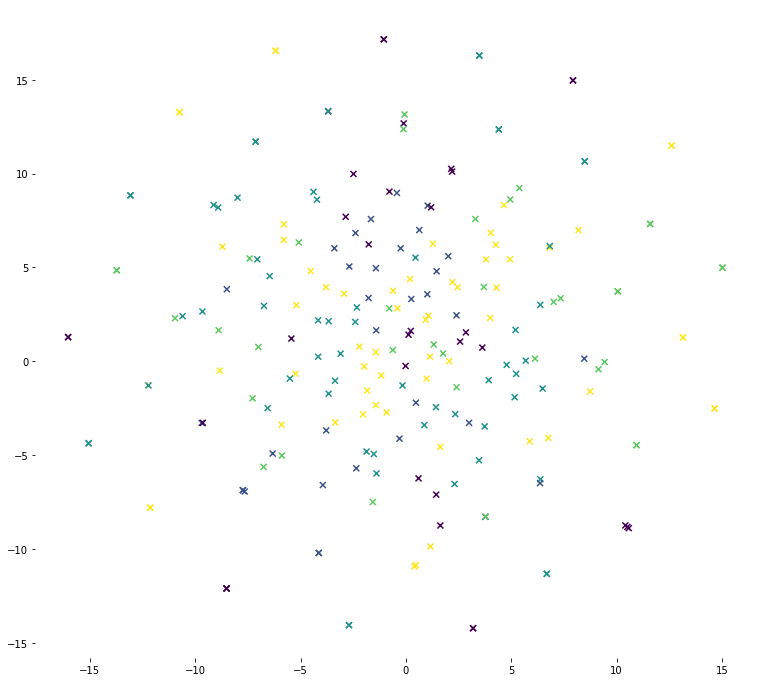

In [116]:
import matplotlib
import matplotlib.pyplot as plt
# fig, ax = plt.subplots()

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
# setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=top_gh.lang_encoded.values, marker="x")

# Perform a train/test split in order to work with some other models...

# Split Train/Test

In [117]:
top_gh.head()

,language,original,stars,original_cnt,article,article_cnt,lemmatized,lemm_cnt,clean,lang_encoded
title,,,,,,,,,,
NetBSD/src,none,"NetBSD\nNetBSD is a free, fast, secure, and hi...",157,169,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd is a free fast secure and highly...,188,netbsd netbsd free fast secure highly portable...,3
AMReX-Codes/amrex,c++,"\nLicense\nAMReX Copyright (c) 2017, The Regen...",130,556,license amrex copyright c 2017 the regents of ...,568,license amrex copyright c 2017 the regent of t...,568,license amrex copyright 2017 regents universit...,0
joeynmt/joeynmt,python,Joey NMT\n\nGoal and Purpose\nJoey NMT fram...,46,1615,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal and purpose joey nmt framework i...,1797,joey nmt goal purpose joey nmt framework devel...,4
yongzhuo/nlp_xiaojiang,python,nlp_xiaojiang\nAugmentText\n- 回译（效果比较好）\n- EDA...,19,184,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,nlp_xiaojiang augmenttext eda hmm marko syntax...,293,nlp_xiaojiang augmenttext eda hmm marko syntax...,4
alexherbo2/site,javascript,Site\nConfiguration | Theme | Builds | Contrib...,2,14,site configuration theme builds contributing p...,11,site configuration theme build contributing pe...,11,site configuration theme builds contributing p...,2


In [118]:
df = top_gh[['clean','language']]

In [119]:
X = df.clean
y = df.language
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

## Naive Bayes Model

In [120]:
# Define what the languages are... Since we are only using the top occuring languages, this list will be smaller than the first language list.

my_tags = list(df.language.unique())
my_tags

['none', 'c++', 'python', 'javascript', 'java']

In [121]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
accuracy 0.5970149253731343
              precision    recall  f1-score   support

        none       1.00      0.20      0.33        10
         c++       1.00      0.11      0.20         9
      python       0.55      0.86      0.67        21
  javascript       1.00      0.25      0.40         8
        java       0.59      0.89      0.71        19

   micro avg       0.60      0.60      0.60        67
   macro avg       0.83      0.46      0.46        67
weighted avg       0.74      0.60      0.53        67



### Naive Bayes performs poorly at 61.29% accuracy. We want to optimize for accuracy so let's build more models.

# Linear Support Vector Machine

In [122]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 13.1 µs
accuracy 0.7014925373134329
              precision    recall  f1-score   support

        none       0.80      0.80      0.80        10
         c++       0.60      0.33      0.43         9
      python       0.70      0.76      0.73        21
  javascript       0.67      0.50      0.57         8
        java       0.70      0.84      0.76        19

   micro avg       0.70      0.70      0.70        67
   macro avg       0.69      0.65      0.66        67
weighted avg       0.69      0.70      0.69        67



## Linear SVM performs much better at 87.09% accuracy.

# Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 11.9 µs
accuracy 0.7014925373134329
              precision    recall  f1-score   support

        none       0.80      0.80      0.80        10
         c++       0.75      0.33      0.46         9
      python       0.70      0.76      0.73        21
  javascript       0.50      0.50      0.50         8
        java       0.73      0.84      0.78        19

   micro avg       0.70      0.70      0.70        67
   macro avg       0.69      0.65      0.65        67
weighted avg       0.70      0.70      0.69        67



## This Logistic Regression model performs slightly worse than the first one.

In [124]:
import gensim

# Word2vec and Logistic Regression


In [125]:
print(gensim.__version__)

3.7.3


### Use gensim to load a word2vec model pretrained on google news and perform some simple actions with the word vectors.

In [126]:
from gensim.models import Word2Vec
path = '~/Documents/Coding/Codeup/CourseWork/ds-methodologies-exercises/nlp/'
file = "GoogleNews-vectors-negative300.bin.gz"
wv = gensim.models.KeyedVectors.load_word2vec_format(path+file, binary=True)
wv.init_sims(replace=True)

###  Normalize the word2vec vectors first, so they all have equal length. 

### Load up a Google News model. 

In [127]:
from itertools import islice
list(islice(wv.vocab, 13030, 13050))

['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

### Define some functions to perform Bag of Words analysis on the word vectors. Simple stuff like word averaging, summation, and weighted addition.

In [128]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [129]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

### Tokenize the text, Train/Test split...

In [130]:
df.head()

,clean,language
title,,
NetBSD/src,netbsd netbsd free fast secure highly portable...,none
AMReX-Codes/amrex,license amrex copyright 2017 regents universit...,c++
joeynmt/joeynmt,joey nmt goal purpose joey nmt framework devel...,python
yongzhuo/nlp_xiaojiang,nlp_xiaojiang augmenttext eda hmm marko syntax...,python
alexherbo2/site,site configuration theme builds contributing p...,javascript


In [131]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(df, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['clean']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['clean']), axis=1).values

X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

In [132]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['language'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.language))
print(classification_report(test.language, y_pred,target_names=my_tags))

accuracy 0.4626865671641791
              precision    recall  f1-score   support

        none       0.53      0.80      0.64        10
         c++       0.20      0.22      0.21         9
      python       0.64      0.43      0.51        21
  javascript       0.20      0.12      0.15         8
        java       0.48      0.58      0.52        19

   micro avg       0.46      0.46      0.46        67
   macro avg       0.41      0.43      0.41        67
weighted avg       0.47      0.46      0.45        67



## The Word2vec and Logistic Regression model performs at 77.42% accuracy.

# BOW with Keras


In [133]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils
from keras.models import Sequential

import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [134]:
print(keras.__version__)

2.2.4


In [135]:
df.head()

,clean,language
title,,
NetBSD/src,netbsd netbsd free fast secure highly portable...,none
AMReX-Codes/amrex,license amrex copyright 2017 regents universit...,c++
joeynmt/joeynmt,joey nmt goal purpose joey nmt framework devel...,python
yongzhuo/nlp_xiaojiang,nlp_xiaojiang augmenttext eda hmm marko syntax...,python
alexherbo2/site,site configuration theme builds contributing p...,javascript


In [136]:
df.shape

(221, 2)

### Split Train/Test... 

### Tokenize and then turn texts to matrix.

In [137]:
train_size = int(len(df) * .7)
train_text = df['clean'][:train_size]
train_label = df['language'][:train_size]

test_text = df['clean'][train_size:]
test_label = df['language'][train_size:]

max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_text) # only fit on train

x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)


In [138]:
print(train_size)
print(train_text)
print(train_label)
print(test_text)
print(test_label)

print(type(tokenize))

print(x_train)
print(len(x_train))
print(x_test)
print(len(x_test))

154
title
NetBSD/src                                                           netbsd netbsd free fast secure highly portable...
AMReX-Codes/amrex                                                    license amrex copyright 2017 regents universit...
joeynmt/joeynmt                                                      joey nmt goal purpose joey nmt framework devel...
yongzhuo/nlp_xiaojiang                                               nlp_xiaojiang augmenttext eda hmm marko syntax...
alexherbo2/site                                                      site configuration theme builds contributing p...
dawoudt/JustWatchAPI                                                 justwatchapi justwatch com 3 api install pytho...
apple/swift-source-compat-suite                                      source compatibility suite source compatibilit...
alexherbo2/configuration.chrome                                      chrome configuration completed extension dead ...
Genivia/ugrep                         

In [139]:
encoder = LabelEncoder()
encoder.fit(train_label)
y_train = encoder.transform(train_label)
y_test = encoder.transform(test_label)

In [140]:
print(y_train)
print(len(y_train))
print(y_test)
print(len(y_test))

[3 0 4 4 2 4 4 2 0 3 0 4 4 4 1 4 4 3 0 3 2 4 3 2 2 2 3 1 3 0 2 2 2 3 1 1 2
 4 4 1 3 4 4 0 2 4 2 4 3 3 0 2 2 1 4 2 4 0 2 3 1 1 0 2 2 0 0 2 4 2 4 2 0 2
 4 4 3 4 3 2 0 2 4 2 2 4 2 2 0 4 3 4 4 2 1 4 2 3 4 0 2 3 4 4 2 2 2 2 2 3 4
 3 4 4 4 2 3 1 1 1 0 4 4 0 3 3 1 3 3 2 2 1 2 4 0 3 2 1 4 2 4 1 2 3 0 2 2 4
 2 4 2 4 0 3]
154
[2 1 4 0 4 3 1 1 0 3 4 0 3 3 0 2 0 4 1 0 2 4 4 4 1 2 2 0 1 3 0 0 2 1 3 0 0
 1 4 1 4 2 0 2 3 2 4 4 2 1 3 4 4 0 4 0 2 1 3 2 4 1 1 1 1 1 1]
67


In [141]:
y_test

array([2, 1, 4, 0, 4, 3, 1, 1, 0, 3, 4, 0, 3, 3, 0, 2, 0, 4, 1, 0, 2, 4,
       4, 4, 1, 2, 2, 0, 1, 3, 0, 0, 2, 1, 3, 0, 0, 1, 4, 1, 4, 2, 0, 2,
       3, 2, 4, 4, 2, 1, 3, 4, 4, 0, 4, 0, 2, 1, 3, 2, 4, 1, 1, 1, 1, 1,
       1])

In [142]:
np.max(y_train)

4

In [143]:
y_train.shape

(154,)

In [144]:
num_classes = int(np.max(y_train)) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)


In [145]:
y_train.shape

(154, 5)

In [146]:


batch_size = 32
epochs = 2

# Build the model
model = Sequential()
# print(type(model))
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 138 samples, validate on 16 samples
Epoch 1/2
138/138 [==============================] - 0s 3ms/step - loss: 1.6094 - acc: 0.2319 - val_loss: 1.1056 - val_acc: 0.4375
Epoch 2/2
138/138 [==============================] - 0s 341us/step - loss: 1.1363 - acc: 0.6159 - val_loss: 1.0116 - val_acc: 0.5625


## Achieved accuracy of 75.6% in 2 epochs

In [147]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

67/67 [==============================] - 0s 104us/step
Test score: 1.649226761575955
Test accuracy: 0.3880597014925373


## Achieved accuracy of 19.35% on the Test dataset.

## Poor performance is probably due to small sample size.